In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
DNAME = "FoodData_Central_csv_2020-04-29/"

In [31]:
x_train=pd.read_csv(DNAME+"x_train.csv",index_col="fdc_id")

In [32]:
y_train=pd.read_csv(DNAME+"y_train_meat_target.csv",index_col="fdc_id")

In [33]:
x_train

,Nitrogen,Protein,Total lipid (fat),"Carbohydrate, by difference",Ash,Energy,Starch,Sucrose,Glucose (dextrose),Fructose,...,22:3,20:4 c,20:5 c,22:5 c,22:6 c,20:2 c,trans-beta-Carotene,trans-Lycopene,"Cryptoxanthin, alpha",Total dietary fiber (AOAC 2011.25)
fdc_id,,,,,,,,,,,,,,,,,,,,,
330351,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490582,0.0,19.64,1.79,0.00,0.0,89.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568528,0.0,4.17,2.08,11.25,0.0,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
592996,0.0,4.40,27.00,62.00,0.0,515.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601720,0.0,2.04,20.41,65.31,0.0,449.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649456,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
661894,0.0,0.83,0.00,10.83,0.0,46.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401253,0.0,18.58,2.65,0.00,0.0,97.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
corr_df = x_train.corr()
for i in range(len(corr_df)):
    corr_df.iloc[i,i]=-1

In [35]:
show_5=0
for row in corr_df:
    if max(corr_df.loc[row])>.8:
        corr_df.drop(row,inplace=True)
        corr_df.drop(row,axis=1,inplace=True)
        if show_5<5:
            print(row)
            show_5+=1
    

Total lipid (fat)
Starch
Glucose (dextrose)
Citric acid
Carbohydrate, by summation


In [8]:
x_train = x_train[corr_df.columns]

In [9]:
for i in x_train.columns:
    print(i)

Nitrogen
Protein
Carbohydrate, by difference
Ash
Energy
Sucrose
Fructose
Lactose
Maltose
Alcohol, ethyl
Specific Gravity
Acetic acid
Lactic acid
Malic acid
Water
Sorbitol
Caffeine
Theobromine
Sugars, Total NLEA
Carbohydrate, other
Galactose
Xylitol
Fiber, total dietary
Ribose
Fiber, soluble
Fiber, insoluble
Total fat (NLEA)
Total sugar alcohols
Calcium, Ca
Chlorine, Cl
Iron, Fe
Magnesium, Mg
Phosphorus, P
Potassium, K
Sodium, Na
Zinc, Zn
Chromium, Cr
Copper, Cu
Fluoride, F
Iodine, I
Manganese, Mn
Selenium, Se
Vitamin A, IU
Vitamin A, RAE
Carotene, beta
Carotene, alpha
Vitamin E (alpha-tocopherol)
Vitamin D (D2 + D3), International Units
Vitamin D2 (ergocalciferol)
Vitamin D3 (cholecalciferol)
25-hydroxycholecalciferol
Vitamin D (D2 + D3)
Phytoene
Phytofluene
Cryptoxanthin, beta
Lycopene
Lutein + zeaxanthin
Vitamin E (label entry primarily)
Tocopherol, beta
Tocopherol, gamma
Tocopherol, delta
Tocotrienol, alpha
Tocotrienol, beta
Tocotrienol, gamma
Tocotrienol, delta
Nickel, Ni
Vitamin E

In [10]:
x_train.max()

Nitrogen                                13.200
Protein                                100.000
Carbohydrate, by difference            100.000
Ash                                     99.800
Energy                                2157.000
                                        ...   
20:2 c                                   0.217
trans-beta-Carotene                    493.000
trans-Lycopene                          32.000
Cryptoxanthin, alpha                    19.000
Total dietary fiber (AOAC 2011.25)       6.320
Length: 183, dtype: float64

In [15]:
vc.index = [0,1]
vc

0    119122
1     18109
dtype: int64

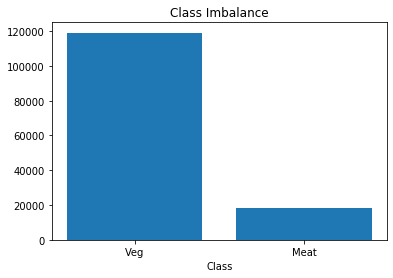

In [36]:
vc=y_train.value_counts()
plt.bar(["Veg","Meat"],vc.values)
plt.title("Class Imbalance")
plt.xlabel("Class")
plt.savefig("figs/class-imbalance")

In [23]:
# I tried to do tomek links + smote but it took too long so I ended up downsampling.

In [24]:
full_train = pd.concat([x_train, y_train], axis=1)
from sklearn.utils import resample
meats = full_train[full_train["is_meat"]==1]
not_meat = full_train[full_train["is_meat"]==0]
not_meat_res = resample(not_meat,
                        replace = False,
                        n_samples = len(meats))

In [25]:
ds_train = pd.concat([not_meat_res, meats])

In [26]:
y_train = ds_train["is_meat"]
x_train = ds_train.drop("is_meat",axis=1)
y_train.value_counts()

1    18109
0    18109
Name: is_meat, dtype: int64

In [27]:
# maybe can just use ds_train but w.e
refull = pd.concat([y_train,x_train], axis=1)

In [28]:
refull.to_csv(DNAME+"train_reduced.csv")
